In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
X_train = np.linspace(1,10)
y_train = X_train*2+np.random.randn(len(X_train))
n_sample=X_train.shape[0]

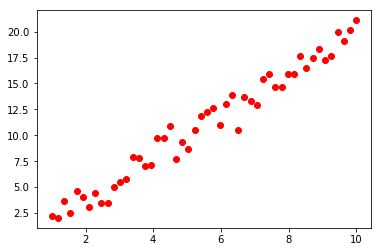

In [43]:
plt.plot(X_train,y_train,'ro')

- tf.Variable(<initial-value>) must give a initial value
- tf.get_variable(name,shape,initializer) can share same name variable 

In [44]:
x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)
with tf.variable_scope('martrix',reuse=tf.AUTO_REUSE):
    W=tf.get_variable('weight',initializer=tf.contrib.layers.xavier_initializer())
    b=tf.get_variable('bias')

    y_hat=tf.multiply(W,x)+b

    cost=tf.reduce_sum(tf.square(y_hat-y))/(2*n_sample)
    # with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
    optimizer=tf.train.AdamOptimizer(1e-3).minimize(cost)



Epoch :0000	cost = 116.852012634
Epoch :0100	cost = 0.865751028
Epoch :0200	cost = 0.606013179
Epoch :0300	cost = 0.510779023
Epoch :0400	cost = 0.490562797
Epoch :0500	cost = 0.486784339
Epoch :0600	cost = 0.486097395
Epoch :0700	cost = 0.485972732
Epoch :0800	cost = 0.485949785
Epoch :0900	cost = 0.485945731
(0.48594469, array(2.030379295349121, dtype=float32), array(-0.18628229200839996, dtype=float32))


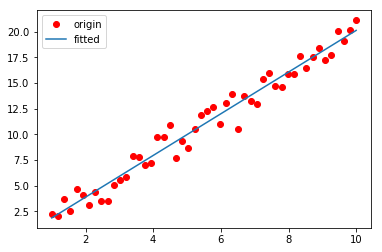

In [45]:
train_epochs=1000
print_step=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(train_epochs):
        for j,l in zip(X_train,y_train):
            sess.run(optimizer,feed_dict={x:j,y:l})
            
        if i%print_step==0:
            print('Epoch :{:04d}\tcost = {:.9f}'.format(i,sess.run(cost,feed_dict={x:X_train,y:y_train})))
    res=sess.run([cost,W,b],feed_dict={x:X_train,y:y_train})
#     print("optimization over\nTraining cost ={}\tW = {0[1]\tb = {0[2]}}".format()
    print(res[0],np.squeeze(res[1]),np.squeeze(res[2]))
    plt.plot(X_train,y_train,'ro',label='origin')
    plt.plot(X_train,X_train*np.squeeze(sess.run(W))+np.squeeze(sess.run(b)),label='fitted')
    plt.legend()
    plt.show()

In [47]:
tf.enable_eager_execution()

AttributeError: 'module' object has no attribute 'enable_eager_execution'